In [2]:
import pandas as pd

def read_excel_sheet(file_path, sheet_name=None, header=0):
    """
    Reads a specific sheet from an Excel file and returns a DataFrame.
    
    Args:
    file_path (str): Path to the Excel file.
    sheet_name (str or int, optional): Name or index of the sheet to read. If None, reads the first sheet.
    header_row (int, optional): Row number to use as the header (0-indexed). 
                                If None, assumes the first row is the header.
    
    Returns:
    pandas.DataFrame: DataFrame containing the sheet data.
    """
    # If header_row is None, pandas will automatically use the first row as header
    df = pd.read_excel(file_path, sheet_name=sheet_name, header=header)

    return df

In [3]:
cycle_1 = read_excel_sheet('../shared_data_read_only/Data/AfriKids/InternalData/AfriKids_CBE_Data/AfriKids CBE Cycle 1 Learner Facilitator LC-SMC Training.xls', sheet_name="Learner Data Template")
cycle_2 = read_excel_sheet('../shared_data_read_only/Data/AfriKids/InternalData/AfriKids_CBE_Data/AfriKids CBE Cycle 2 Learner Facilitator LC-SMC Training.xls', sheet_name="Learner Data Template")
cycle_3 = read_excel_sheet('../shared_data_read_only/Data/AfriKids/InternalData/AfriKids_CBE_Data/AfriKids CBE Cycle 3 Learner Facilitator LC-SMC Training.xlsx', sheet_name="Learner Data Template")
cycle_4 = read_excel_sheet('../shared_data_read_only/Data/AfriKids/InternalData/AfriKids_CBE_Data/AfriKids CBE Cycle 4 Learner Facilitator LC-SMC Training.xls', sheet_name="Learner Data Template")

In [4]:
def clean_data(data):
    data = data[['REGION', 'SEX', 'AGE', 'DROP OUT (YES/NO)', 'WHICH QUARTER CHILD DROPPED', 'GRADUATED (YES/NO)']]

    data['DROP OUT (YES/NO)'] = data['DROP OUT (YES/NO)'].str.lower()
    data['GRADUATED (YES/NO)'] = data['GRADUATED (YES/NO)'].str.lower()
    data['SEX'] = data['SEX'].str.lower()
    
    data.dropna()
    return data

In [5]:
cycle_1 = clean_data(cycle_1)
cycle_2 = clean_data(cycle_2)
cycle_3 = clean_data(cycle_3)
cycle_4 = clean_data(cycle_4)

/tmp/ipykernel_59303/369806175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DROP OUT (YES/NO)'] = data['DROP OUT (YES/NO)'].str.lower()
/tmp/ipykernel_59303/369806175.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GRADUATED (YES/NO)'] = data['GRADUATED (YES/NO)'].str.lower()
/tmp/ipykernel_59303/369806175.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [6]:
cycle_1

,REGION,SEX,AGE,DROP OUT (YES/NO),WHICH QUARTER CHILD DROPPED,GRADUATED (YES/NO)
0,Upper East,m,13.0,no,NaN,yes
1,Upper East,f,13.0,no,NaN,yes
2,Upper East,f,11.0,no,NaN,yes
3,Upper East,f,12.0,no,NaN,yes
4,Upper East,f,14.0,no,NaN,yes
...,...,...,...,...,...,...
1416,NaN,NaN,NaN,NaN,4.0,NaN
1417,NaN,NaN,NaN,NaN,NaN,NaN
1418,NaN,NaN,NaN,NaN,NaN,NaN
1419,NaN,NaN,NaN,NaN,4.0,NaN


In [102]:


def plot_data_for_a_cycle(data):
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Assuming your DataFrame is called 'data'

    # 1. Bar chart of gender distribution
    plt.figure(figsize=(10, 6))
    data['SEX'].value_counts().plot(kind='bar')
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

    # 2. Histogram of age distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data['AGE'], bins=10, kde=True)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()

    # 3. Pie chart of dropout rates
    plt.figure(figsize=(10, 6))
    data['DROP OUT (YES/NO)'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Dropout Rates')
    plt.ylabel('')
    plt.show()

    # 4. Bar chart of graduation rates by gender
    plt.figure(figsize=(10, 6))
    grad_by_gender = data.groupby('SEX')['GRADUATED (YES/NO)'].value_counts(normalize=True).unstack()
    grad_by_gender.plot(kind='bar', stacked=True)
    plt.title('Graduation Rates by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Percentage')
    plt.legend(title='Graduated')
    plt.xticks(rotation=0)
    plt.show()


    # 2. Box plot of ages for different groups
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='GRADUATED (YES/NO)', y='AGE', hue='DROP OUT (YES/NO)', data=data)
    plt.title('Age Distribution: Graduation Status vs Dropout Status')
    plt.show()

    print("All plots have been displayed.")

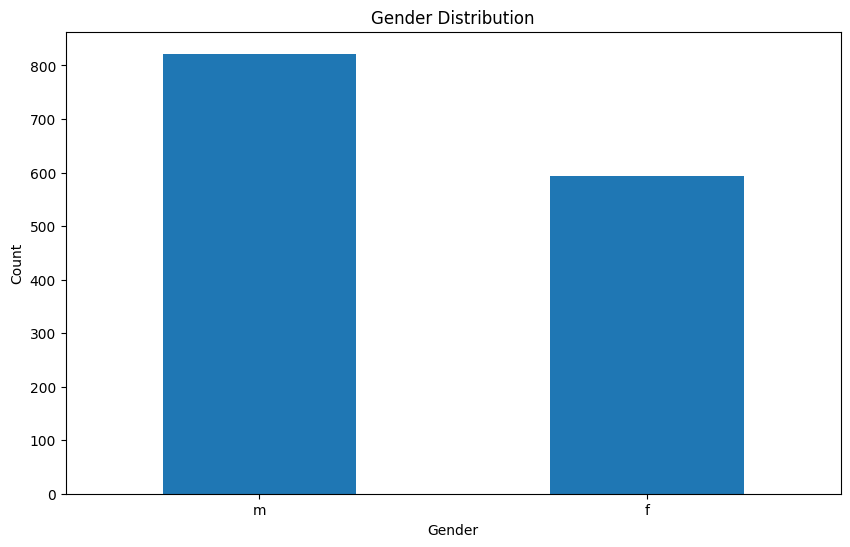

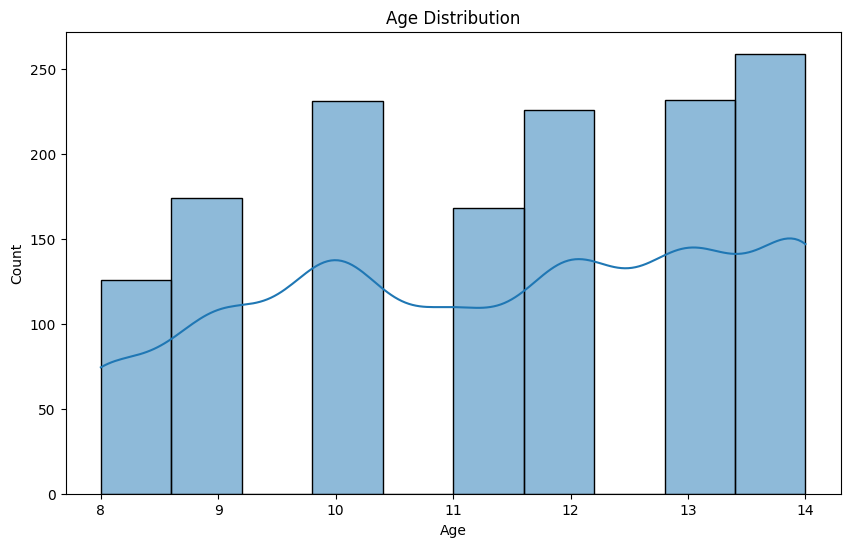

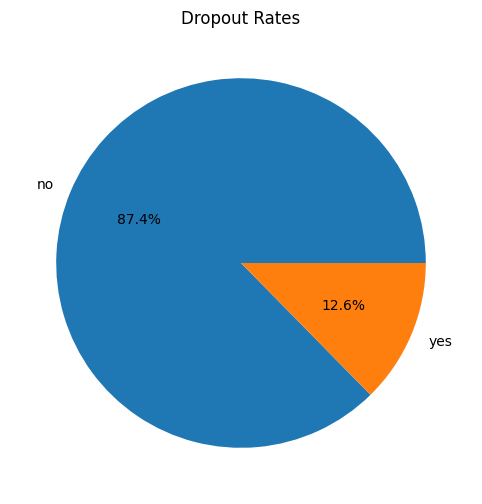

<Figure size 1000x600 with 0 Axes>

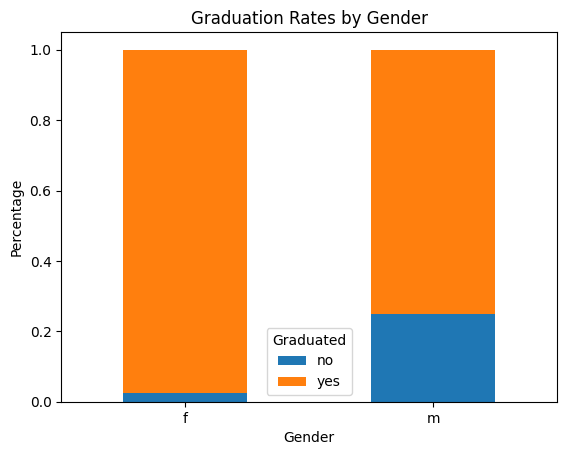

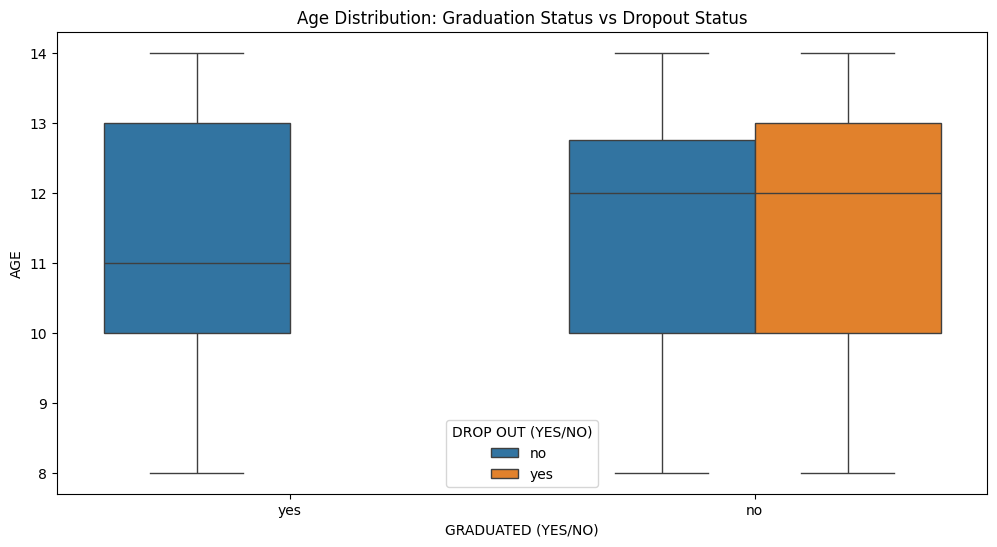

All plots have been displayed.


In [103]:
plot_data_for_a_cycle(cycle_1)